In [7]:
import pandas as pd
from glob import glob
from astropy.table import Table
import matplotlib.pyplot as plt

In [8]:
def plot(file):
    simbad_name = csv_file.split('/')[-1].split(',')[0]
    df = pd.read_csv(csv_file, dtype={'obsID':'string'})

    rate_s = df[df['BAND'] == 'SOFT']['Rate']
    rate_h = df[df['BAND'] == 'HARD']['Rate']
    rate_hr= df[df['BAND'] == 'HR']['Rate']
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    ax[0].plot(rate_hr.abs(), rate_h, marker='s', label=simbad_name)
    ax[1].plot(rate_hr.abs(), rate_s, marker='s')
    
    ax[0].set_ylabel('Soft Rate ct/s)')
    ax[1].set_ylabel('Hard Rate ct/s)')
    ax[0].set_xlabel('Hardness Ratio')

    for a in ax:
        a.set_title(simbad_name)
        a.set_xscale('log')
    
    plt.show()

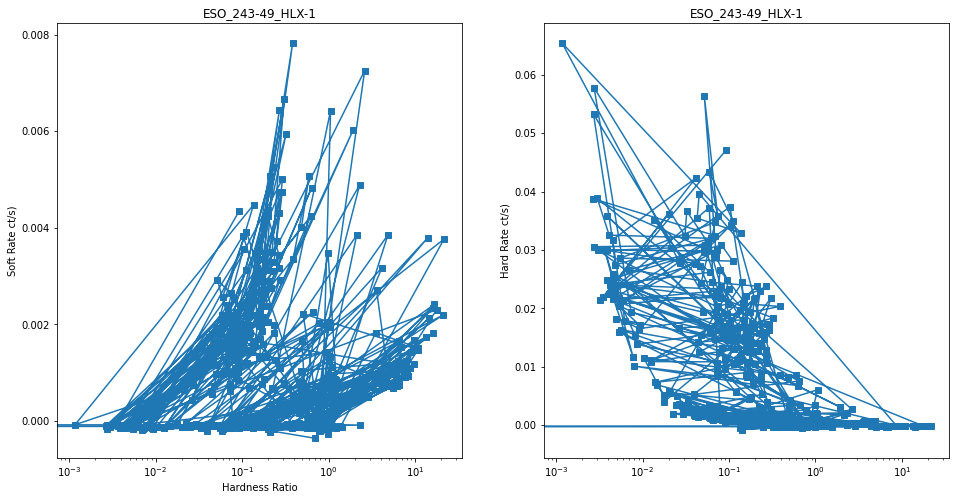

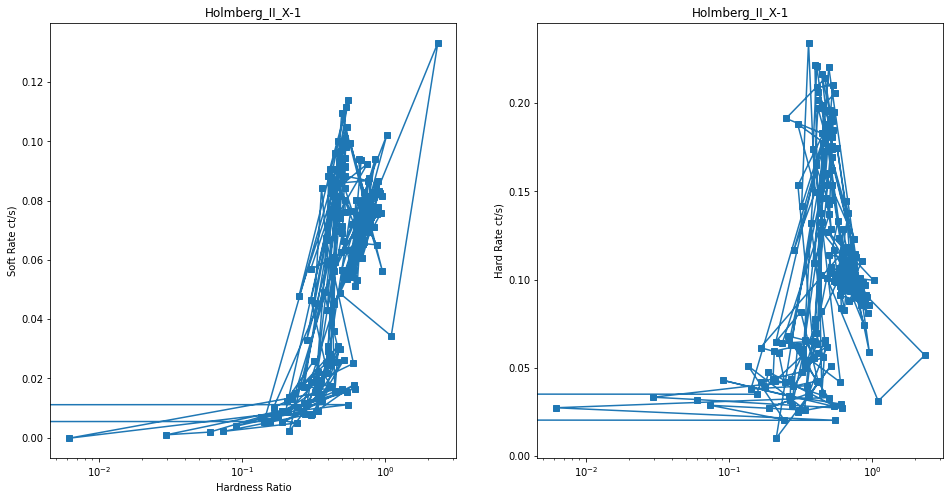

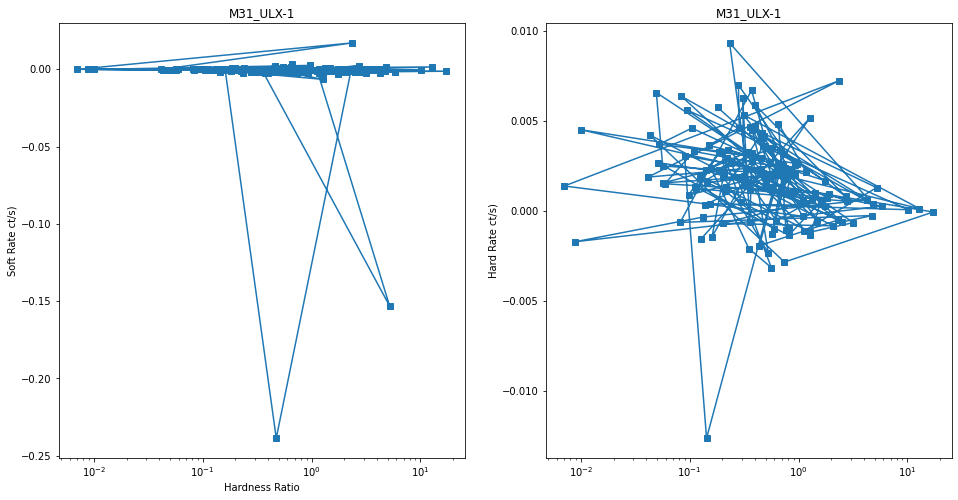

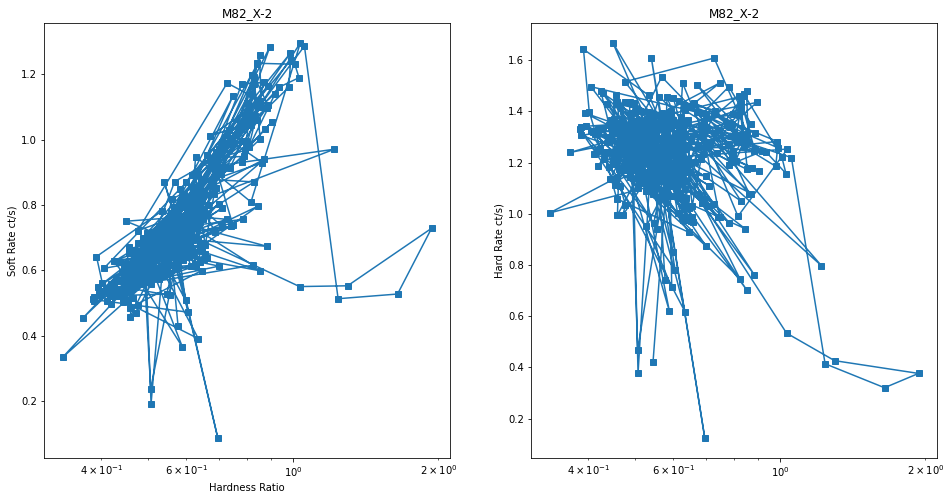

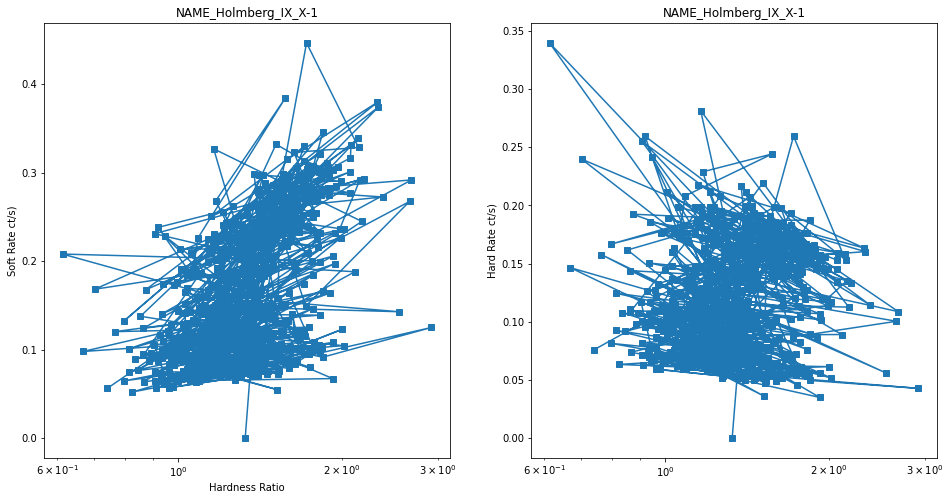

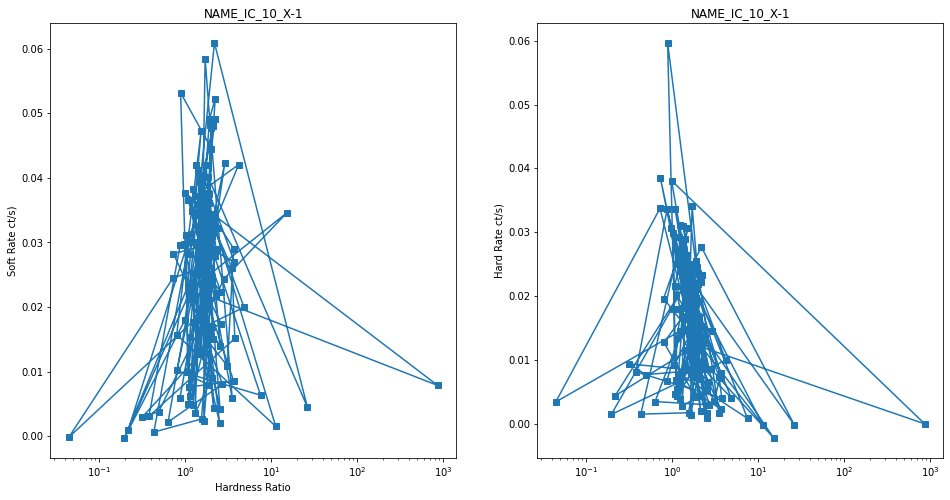

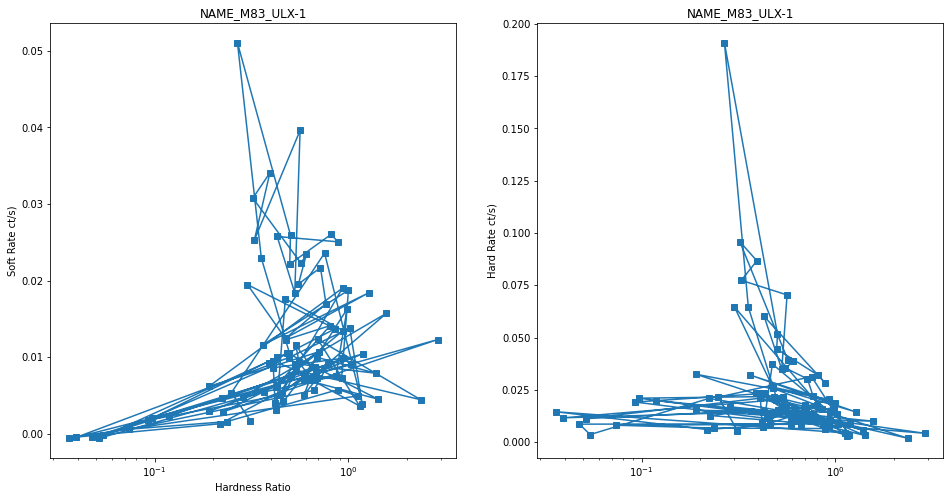

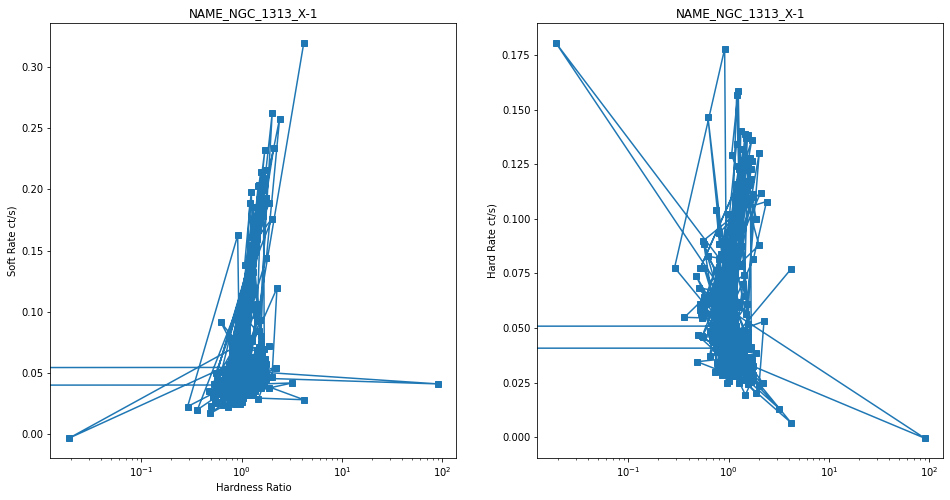

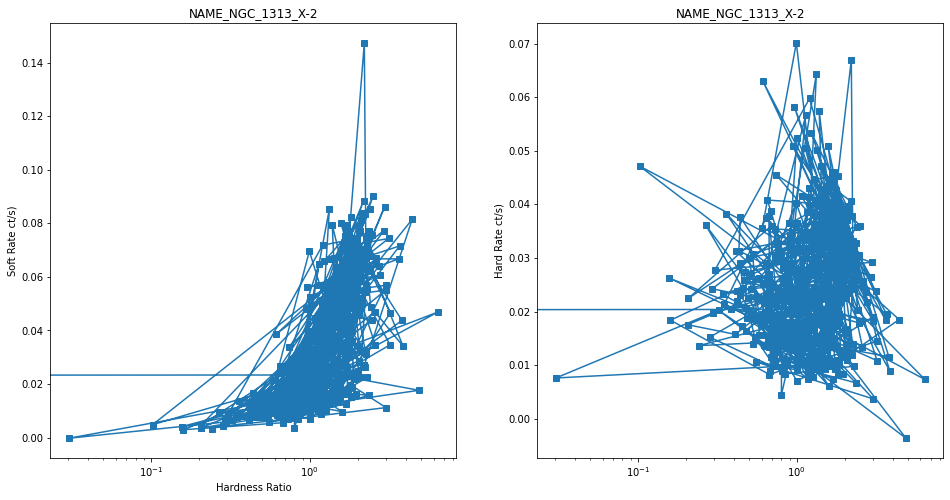

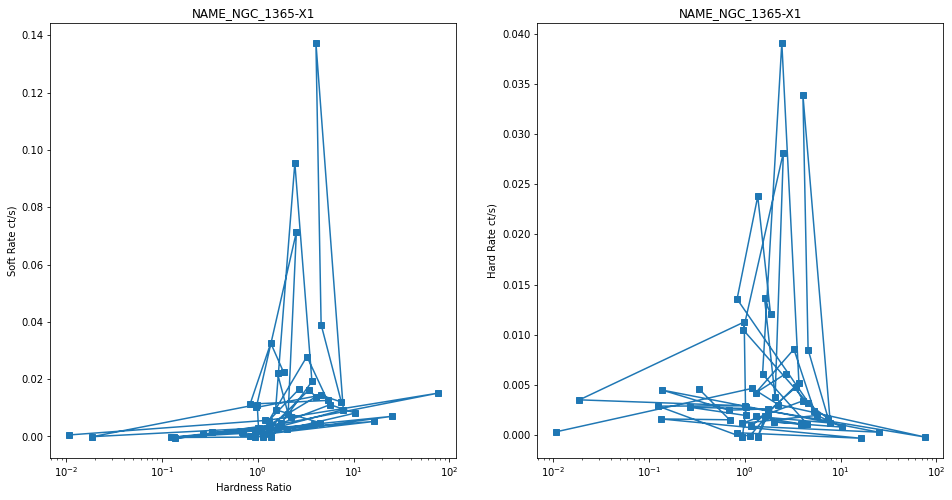

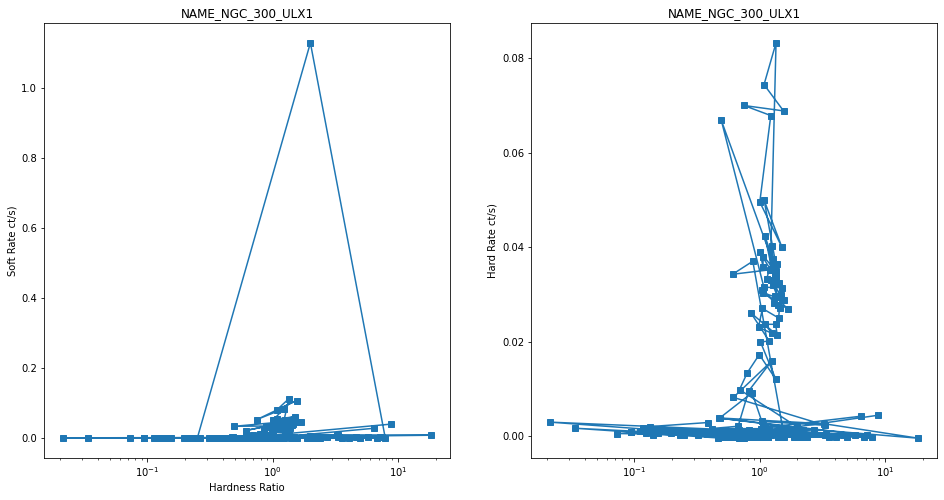

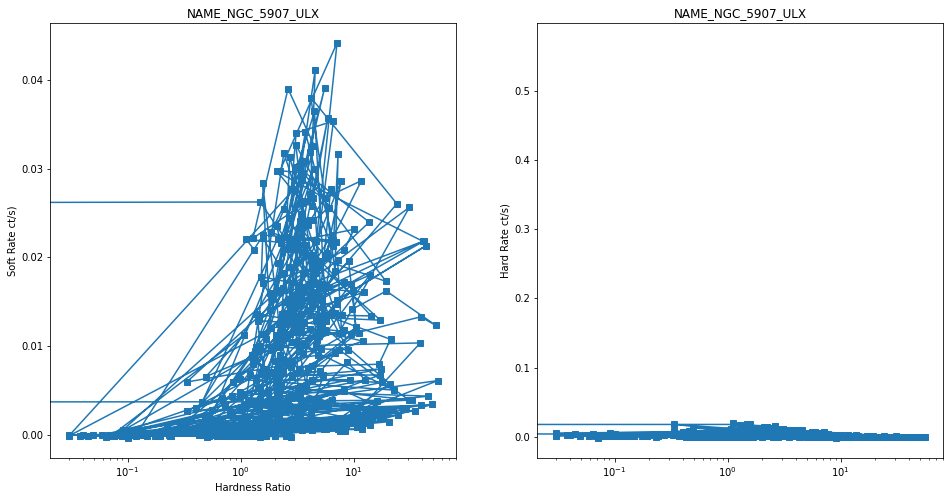

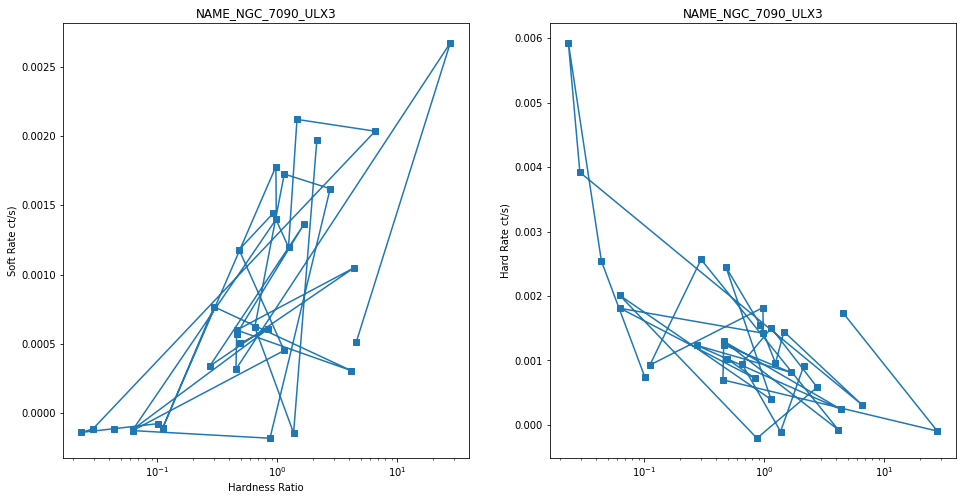

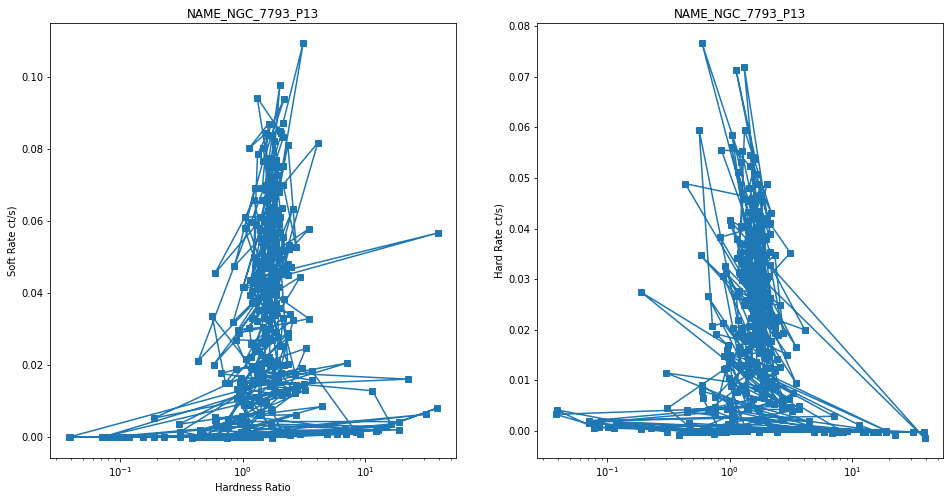

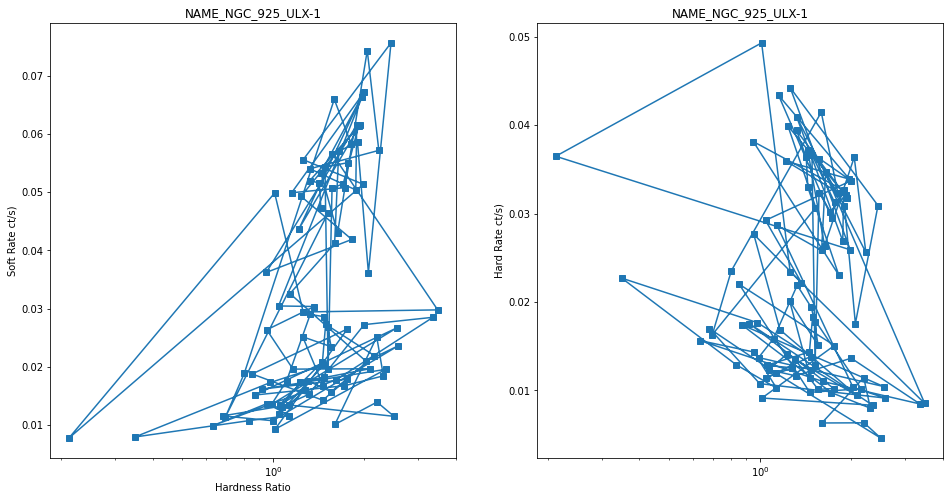

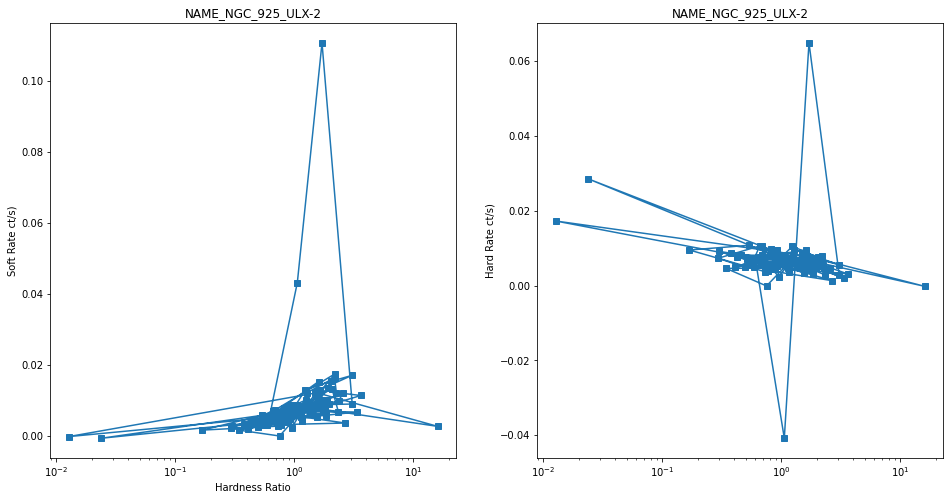

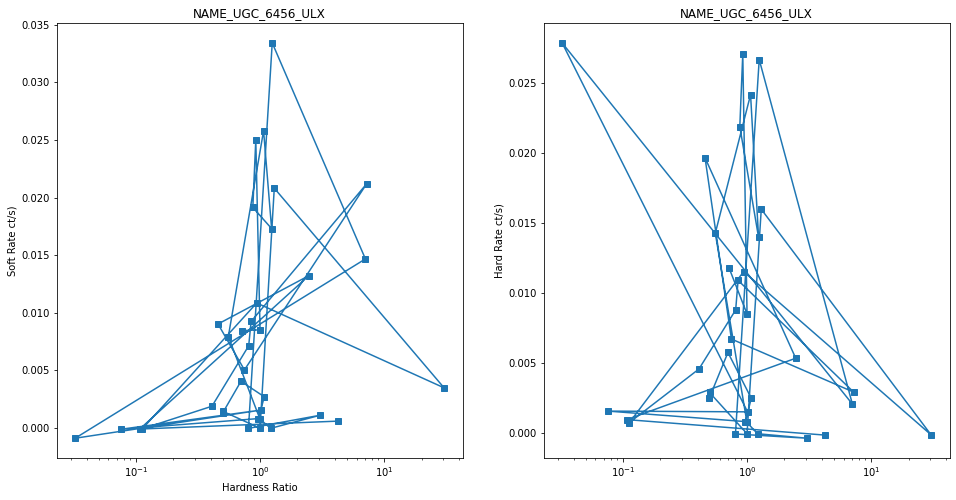

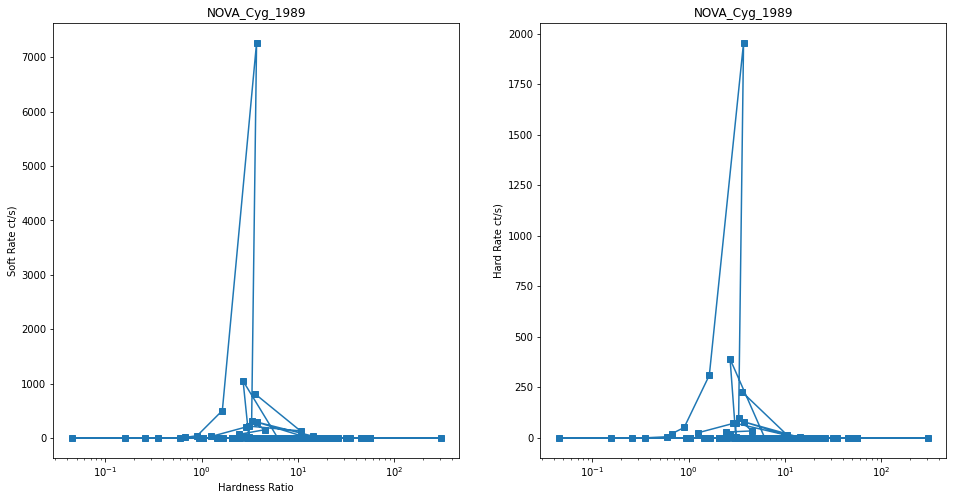

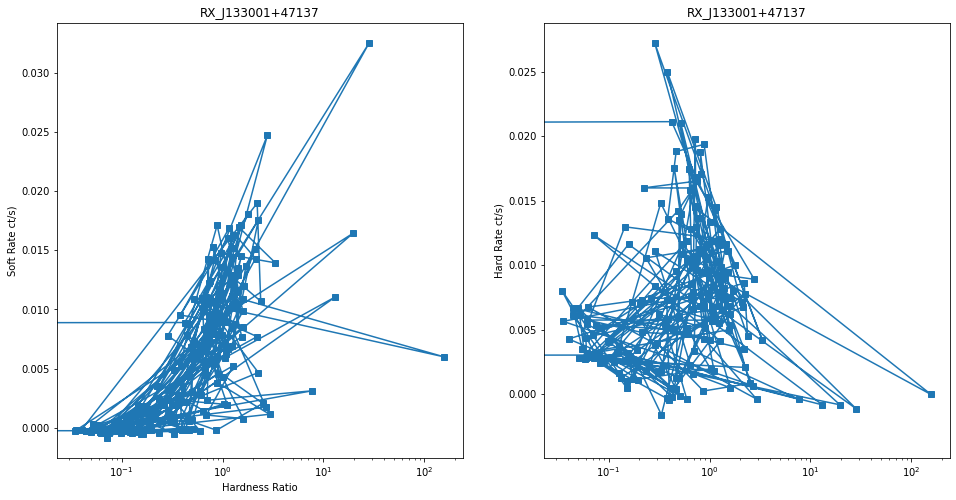

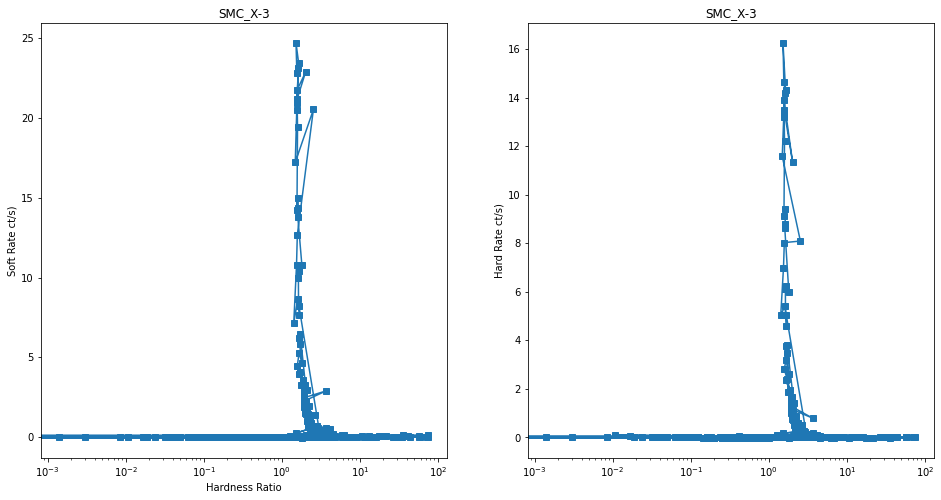

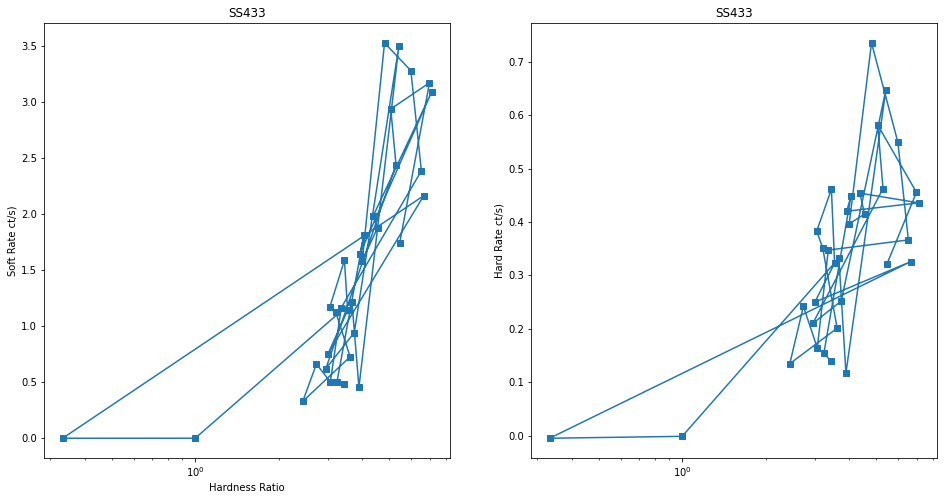

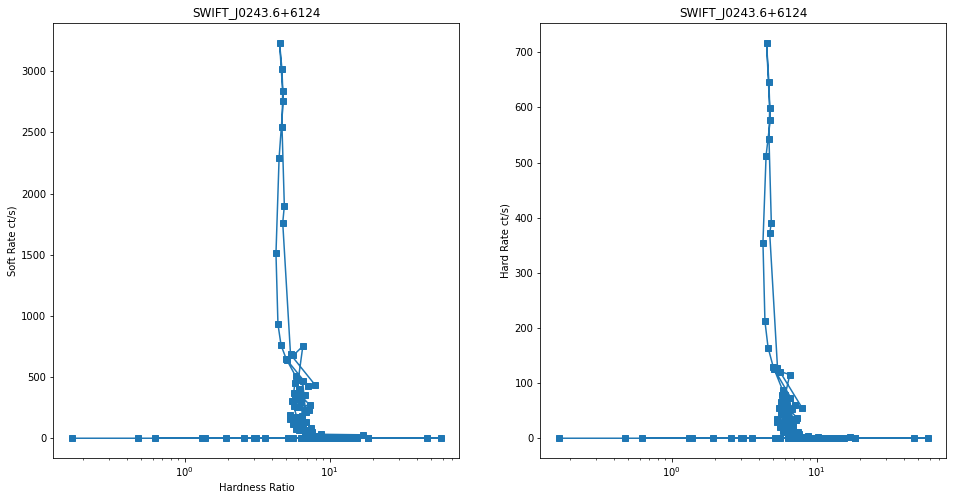

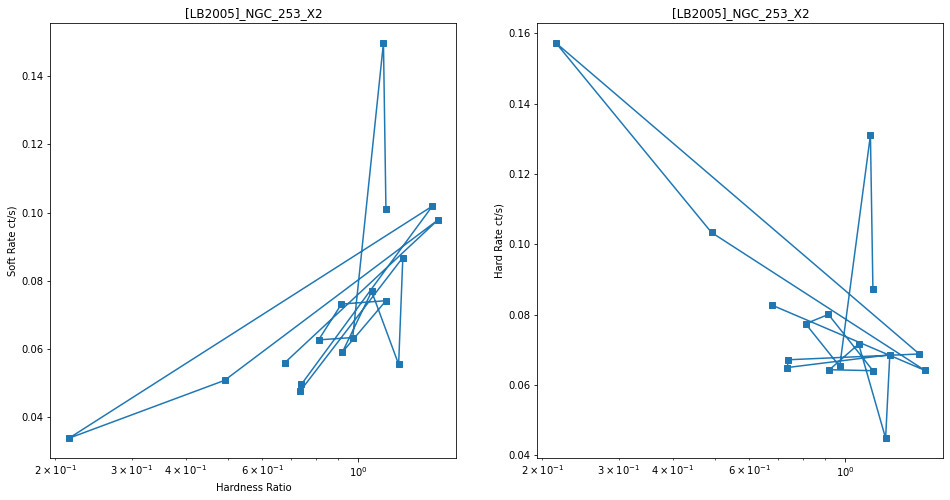

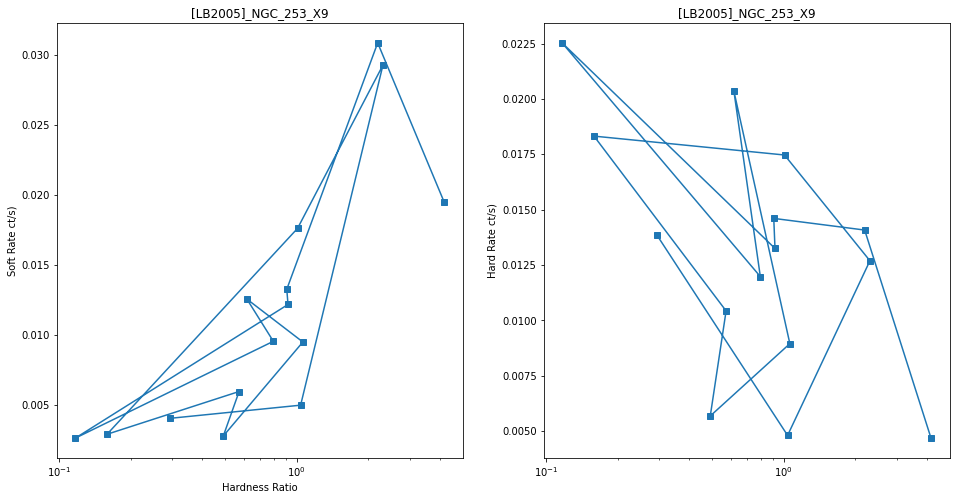

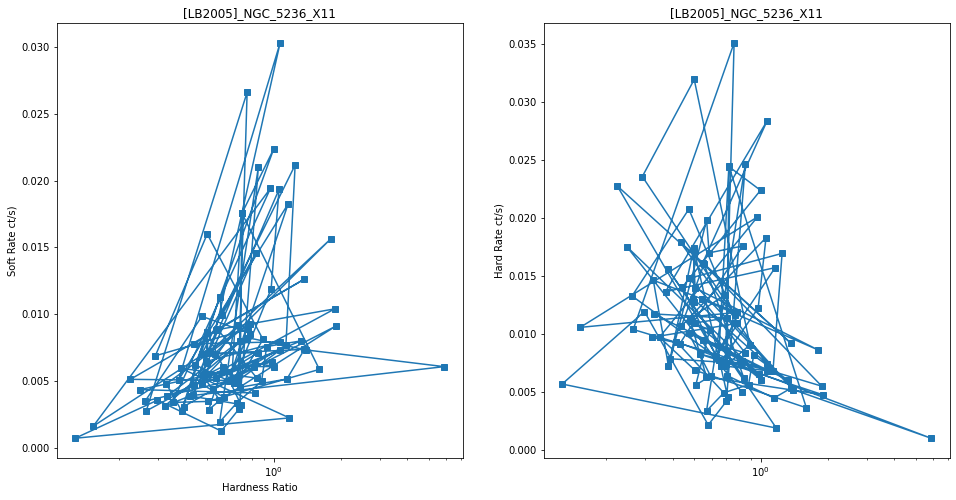

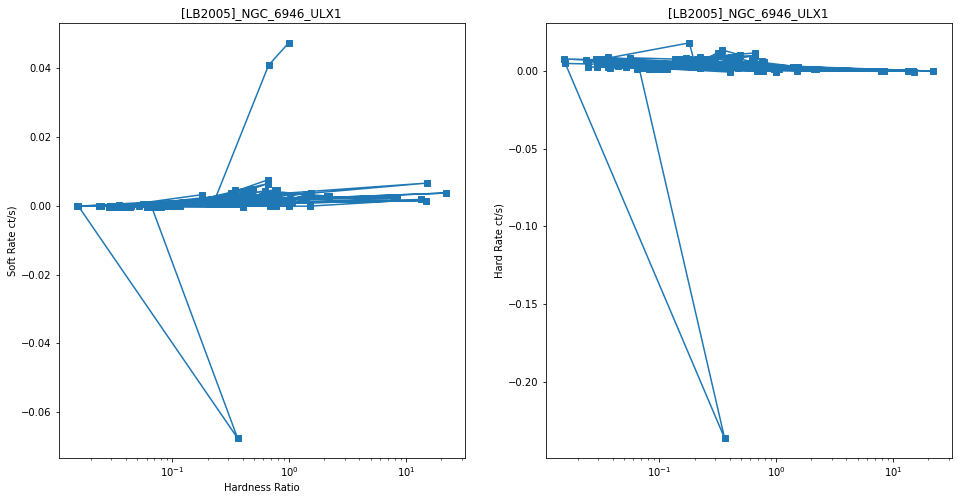

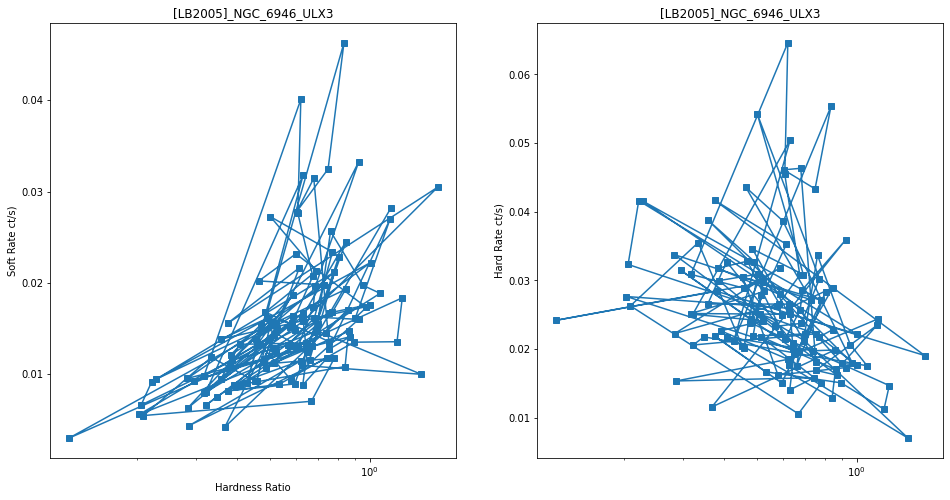

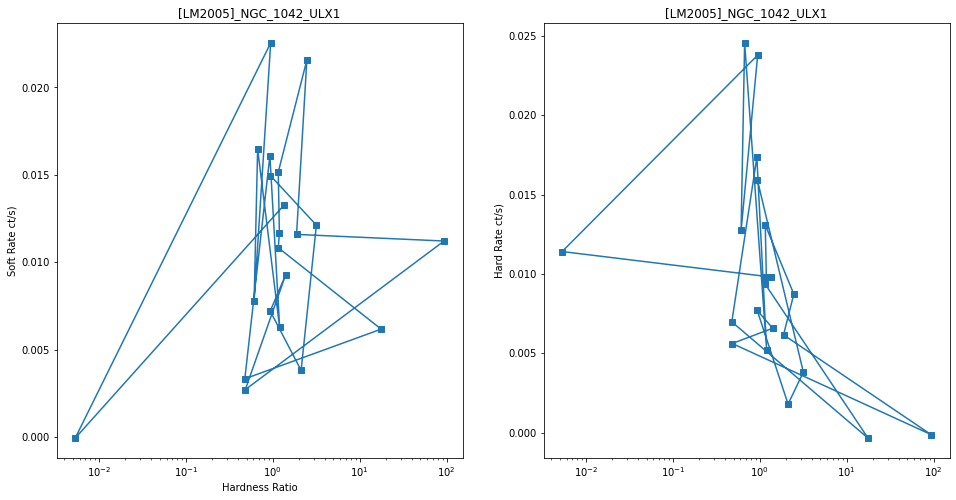

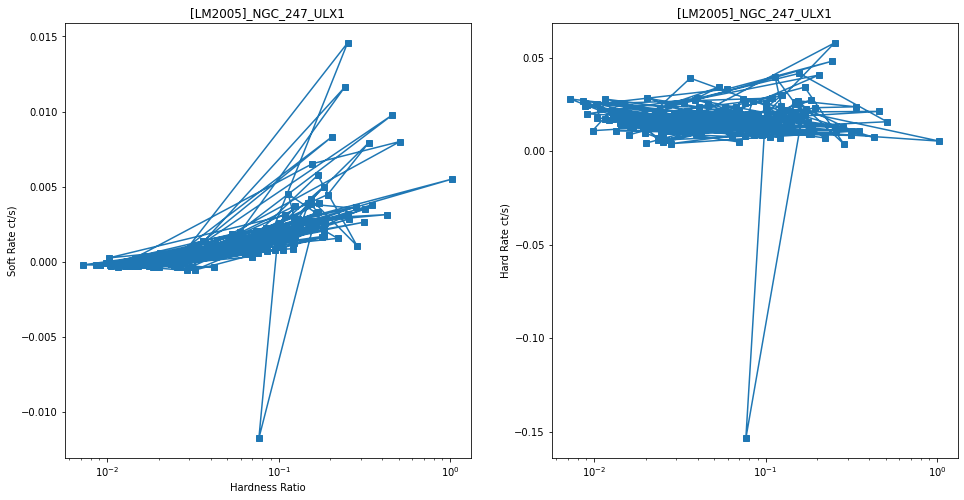

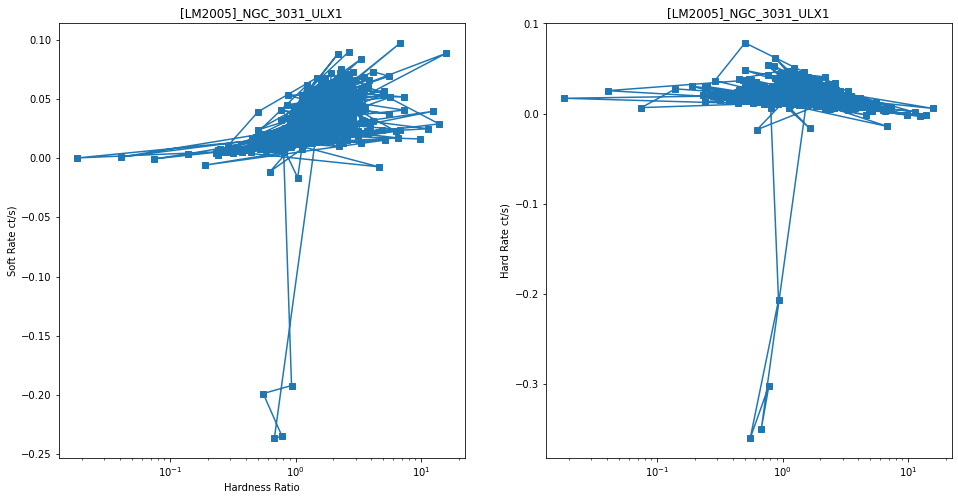

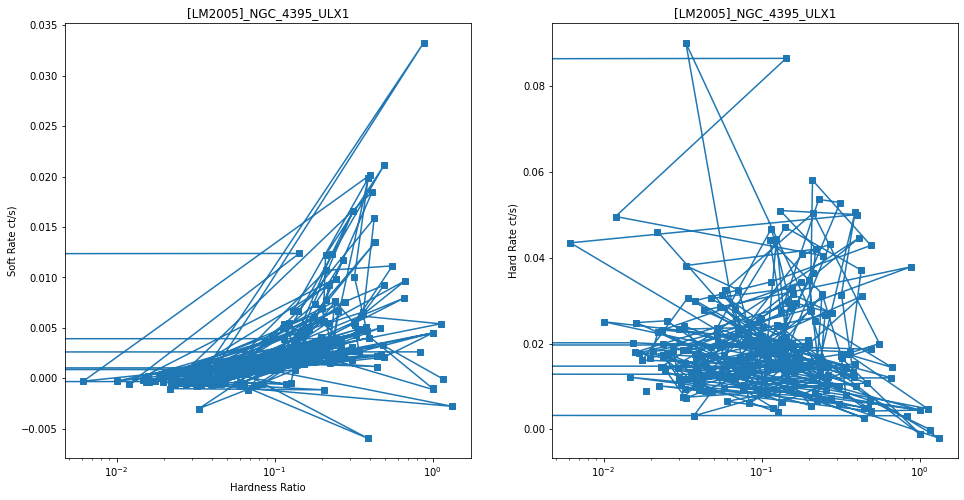

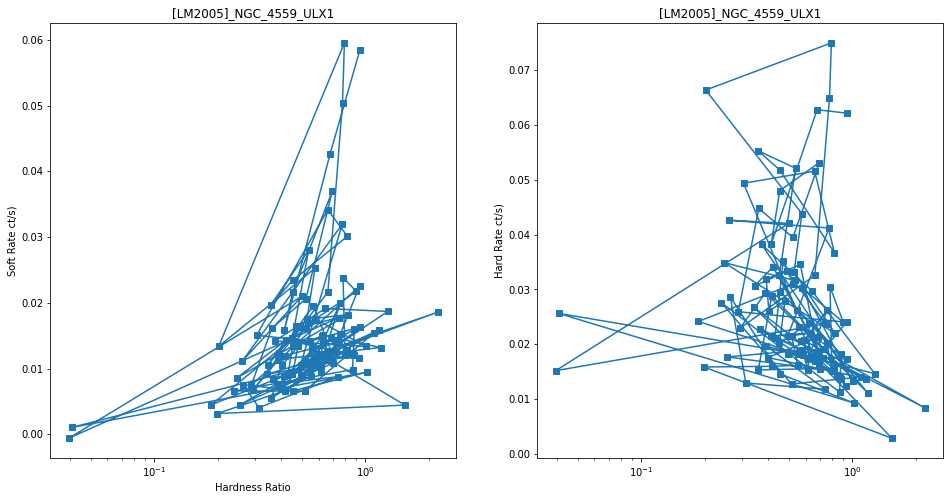

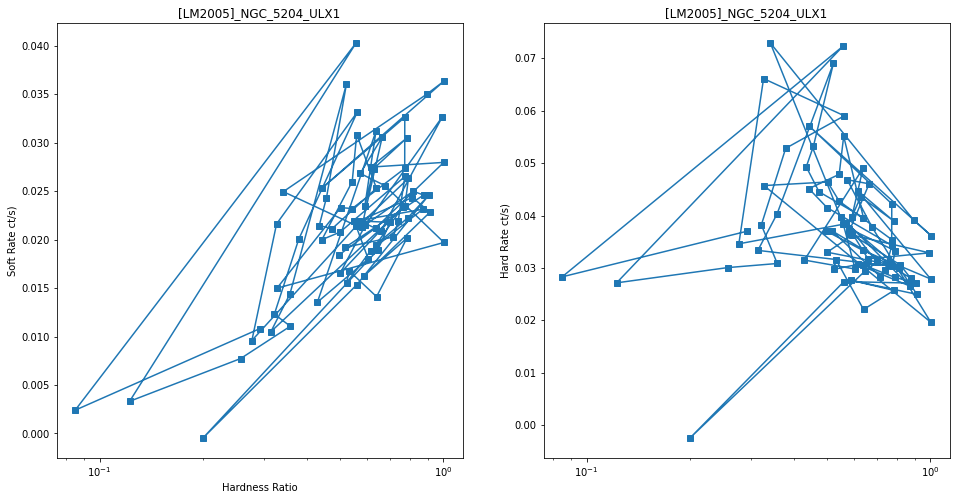

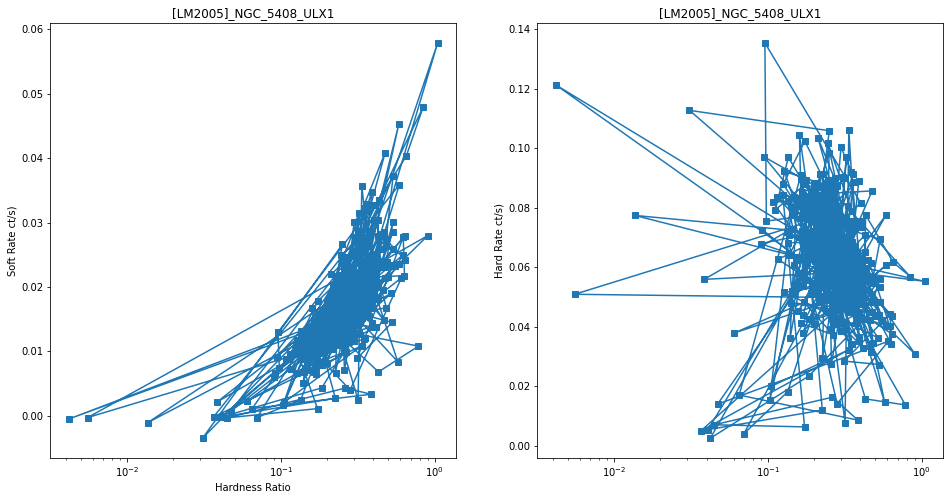

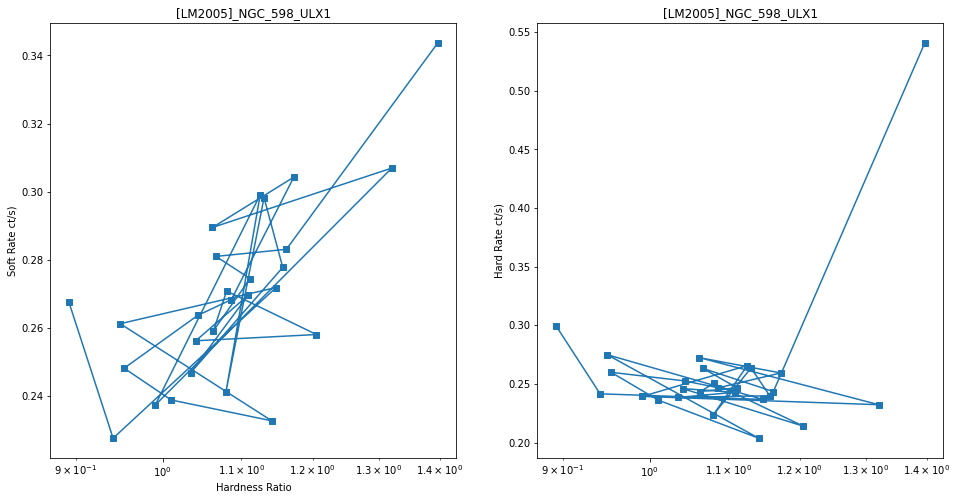

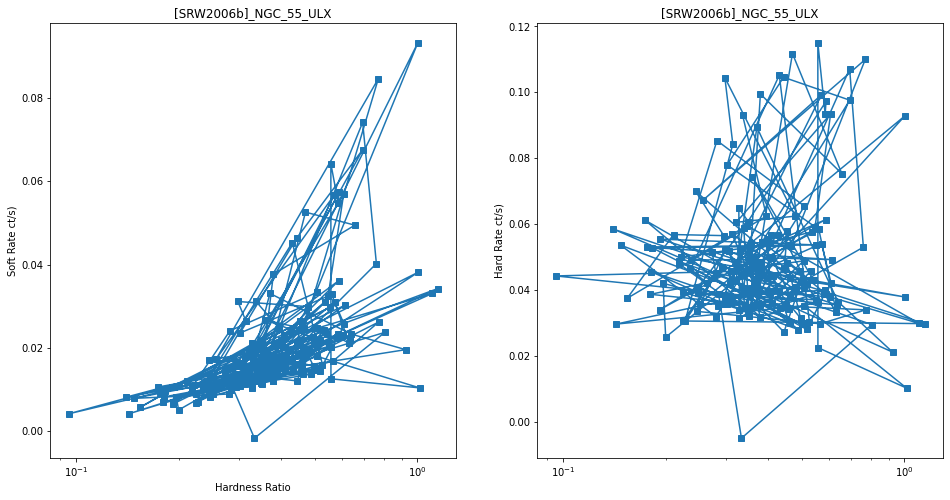

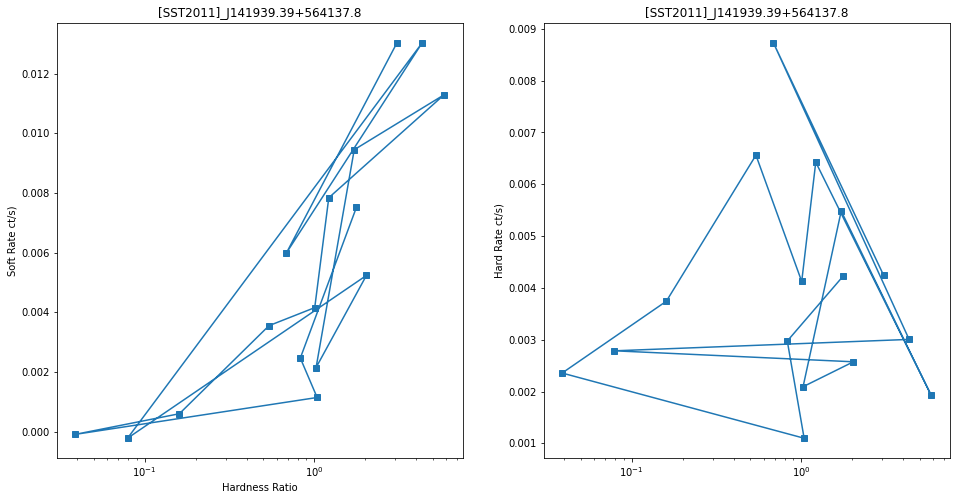

In [9]:
csv_files = glob('../lightcurves/xrt/*hardrat_join.csv')


for csv_file in csv_files:
    plot(csv_file)    

In [ ]:
df

In [ ]:
import numpy as np
import esig.tosig as ts

In [ ]:
two_dim_stream = np.random.random(size=(10,2))
res = ts.stream2sig(two_dim_stream, 2)
print(res)
#[1.0, -0.10661163, -0.69629065, 0.00568302, -0.03958541, 0.11381809, 0.242421033]

In [ ]:
two_dim_stream

In [ ]:
plt.scatter(two_dim_stream.T[0], two_dim_stream.T[1])



In [ ]:
plt.plot(res)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(csv_files[0], dtype={'obsID':'string'})
rate_s = df[df['BAND'] == 'SOFT']['Rate']
rate_h = df[df['BAND'] == 'HARD']['Rate']
rate_hr= df[df['BAND'] == 'HR']['Rate']

In [ ]:
import numpy as np
vals = np.vstack([rate_hr.abs() / max(rate_hr), rate_h.abs() / max(rate_h)]).T
res = ts.stream2sig(vals, 2)
print(vals)
print(res)

In [ ]:
res

In [ ]:
vals

In [ ]:
two_dim_stream

In [24]:
x

array([7, 5, 2, 9, 6])

In [33]:
segments

array([[[ 0.0882684 ,  0.09698549],
        [-0.15294534, -0.29139495]],

       [[-0.15294534, -0.29139495],
        [ 0.04218702,  0.17931535]],

       [[ 0.04218702,  0.17931535],
        [-0.32477324,  0.25233311]],

       ...,

       [[-1.80631768, 13.26490082],
        [-2.16942847, 12.91856605]],

       [[-2.16942847, 12.91856605],
        [-2.27839469, 13.28024644]],

       [[-2.27839469, 13.28024644],
        [-2.54675785, 13.44677603]]])

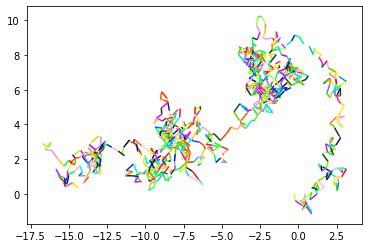

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

xy = (np.random.random((1000, 2)) - 0.5).cumsum(axis=0)

# Reshape things so that we have a sequence of:
# [[(x0,y0),(x1,y1)],[(x0,y0),(x1,y1)],...]
xy = xy.reshape(-1, 1, 2)
segments = np.hstack([xy[:-1], xy[1:]])

fig, ax = plt.subplots()
coll = LineCollection(segments, cmap=plt.cm.gist_ncar)
coll.set_array(np.random.random(xy.shape[0]))

ax.add_collection(coll)
ax.autoscale_view()

plt.show()

In [39]:
segments

array([[[ -0.27477231,   0.02729644],
        [ -0.20061933,  -0.39568616]],

       [[ -0.20061933,  -0.39568616],
        [  0.24572928,  -0.66604864]],

       [[  0.24572928,  -0.66604864],
        [  0.59035584,  -0.83197721]],

       ...,

       [[-16.57796649,   2.54135485],
        [-16.17347292,   2.96857871]],

       [[-16.17347292,   2.96857871],
        [-16.30070046,   2.6867255 ]],

       [[-16.30070046,   2.6867255 ],
        [-16.75507465,   2.89742033]]])

In [56]:
xy

array([[1, 2],
       [0, 8],
       [7, 0],
       [0, 3],
       [8, 6]])

In [68]:
segs = []
for i in range(len(xy)-1):
    x0 = xy[i][0]
    y0 = xy[i][1]
    x1 = xy[i+1][0]
    y1 = xy[i+1][1]
    segs.append([x0,x1])
    segs.append([y0,y1])
segs = np.array(segs)
segs
    

array([[1, 0],
       [2, 8],
       [0, 7],
       [8, 0],
       [7, 0],
       [0, 3],
       [0, 8],
       [3, 6]])

In [53]:
segments = np.vstack([xy,xy])
segments

array([[1, 2],
       [0, 8],
       [7, 0],
       [0, 3],
       [8, 6],
       [1, 2],
       [0, 8],
       [7, 0],
       [0, 3],
       [8, 6]])

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (4,).

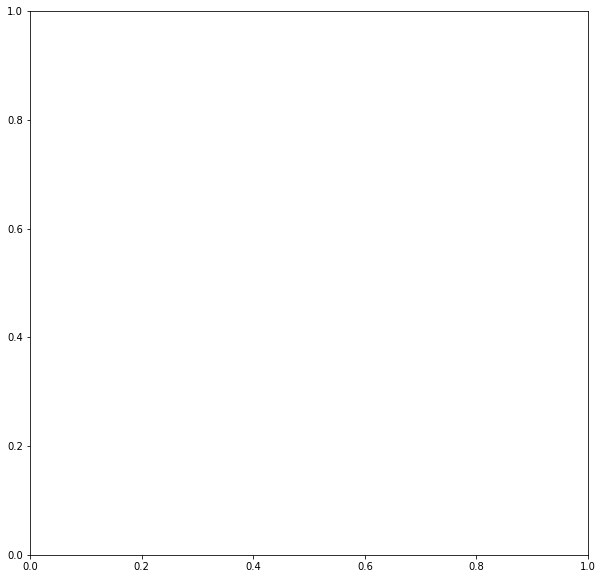

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

xy = (np.random.random((1000, 2)) - 0.5).cumsum(axis=0)
n = 5
x = np.random.randint(10, size=n)
y = np.random.randint(10, size=n)
xy = np.vstack([x,y]).T
segments = np.hstack([xy[:-1], xy[1:]])

fig, ax = plt.subplots(figsize=(10,10))
coll = LineCollection(segments, cmap=plt.cm.gist_ncar)
coll.set_array(np.random.random(xy.shape[0]))

ax.add_collection(coll)
ax.autoscale_view()

plt.show()